# Accuracy of Sample Size

Here we show the relationship between sample size and triple accuracy.
When the sample size is $\lambda d n \log n$ (number of stimuli n, number of dimensions d) then
then the accuracy depends on $\lambda$ independent of $n$, $d$, or judgment noise.

In addition, because we show the accuracy of individual runs for different noise levels,
we can see how reproducable the scaling performance is, i.e. how often the scaling algorithm will return a poor estimate,
and how the noise affects the peak accuracy.

In [1]:
from itertools import product
import numpy as np
import pandas as pd
from cblearn import embedding
import seaborn as sns
from tqdm.notebook import tqdm

from tripletdim.data.datasets import make_triplets

In [2]:
def calc_accuracy(n_triplets, d, n, noise_sd):
    meta, T, T_test = make_triplets(f'normal-{d}-{n}', n_triplets=n_triplets, n_test_triplets=10000, noise_sd=noise_sd, random_state=42)
    return embedding.SOE(d, verbose=False).fit(T).score(T_test)


## increasing repeats and steps will result in nice plots but long runtime
n_repeats = 5
n_steps = 5
##

n_stimuli = 50
data = pd.DataFrame()
settings = list(product(np.arange(n_repeats), [0.5, 2.0], [1, 2, 3], np.linspace(1, 8, n_steps)))
for rep, noise_sd, d, lambd in tqdm(settings):
    n_triplets = lambd * d * n_stimuli * np.log(n_stimuli)
    acc = calc_accuracy(n_triplets, d, n_stimuli, noise_sd)
    data = data.append({'triplets': n_triplets, 'lambda': lambd, 'dimension': d, 'stimuli': n_stimuli,
                        'accuracy': acc, 'repetition': rep, 'noise_sd': noise_sd}, ignore_index=True)

  0%|          | 0/150 [00:00<?, ?it/s]

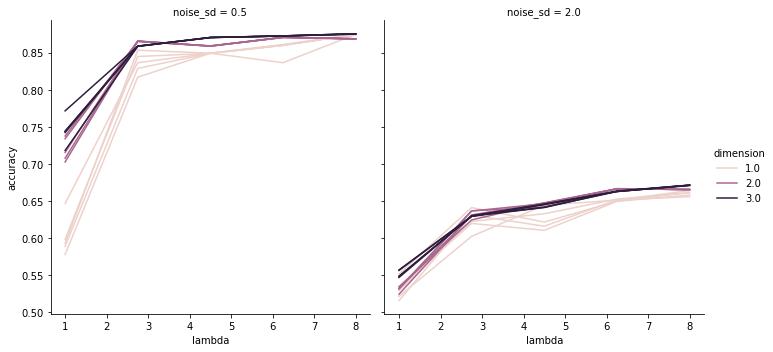

In [3]:
sns.relplot(data=data, x='lambda', y='accuracy', hue='dimension', col='noise_sd', kind='line', estimator=None, units='repetition')